In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [5]:
df.head(5)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


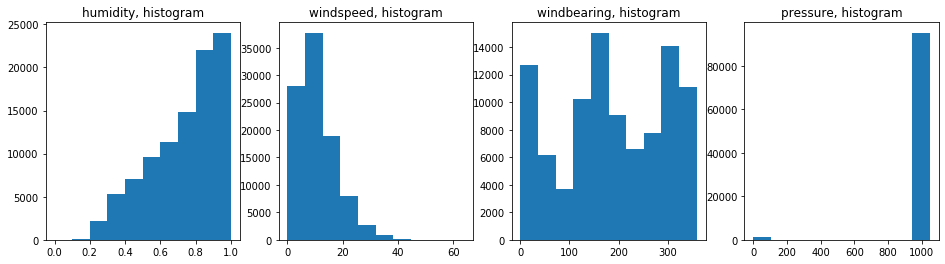

In [13]:
plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.hist(df.humidity)
plt.title('humidity, histogram')

plt.subplot(1,4,2)
plt.hist(df.windspeed)
plt.title('windspeed, histogram')

plt.subplot(1,4,3)
plt.hist(df.windbearing)
plt.title('windbearing, histogram')

plt.subplot(1,4,4)
plt.hist(df.pressure)
plt.title('pressure, histogram')


plt.show()

In [27]:
df.windspeed[df.windspeed > 50]

12179    53.2427
12180    53.1944
12181    63.8526
12182    53.5969
12183    52.9368
20915    50.9726
20928    55.9314
20929    53.1944
63542    50.1354
75398    54.8849
75439    51.1497
Name: windspeed, dtype: float64

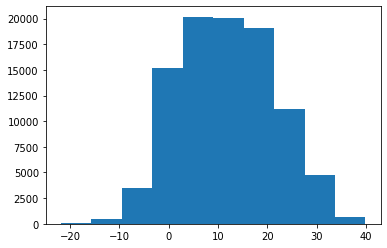

In [30]:
plt.hist(df.temperature)
plt.show()

In [15]:
df.pressure[df.pressure < 800].count()

1288

There are zero pressures and we are going to drop them.

In [19]:
df=df.drop(df[df.pressure <800].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95164 entries, 1 to 96452
Data columns (total 12 columns):
date                   95164 non-null datetime64[ns, UTC]
summary                95164 non-null object
preciptype             95164 non-null object
temperature            95164 non-null float64
apparenttemperature    95164 non-null float64
humidity               95164 non-null float64
windspeed              95164 non-null float64
windbearing            95164 non-null float64
visibility             95164 non-null float64
loudcover              95164 non-null float64
pressure               95164 non-null float64
dailysummary           95164 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 9.4+ MB


In [21]:
Y=df.temperature
X=df[['humidity', 'windspeed', 'windbearing', 'pressure']]

import statsmodels.api as sm
     
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                 2.668e+04
Date:                Sun, 28 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:18:23   Log-Likelihood:            -3.1394e+05
No. Observations:               95164   AIC:                         6.279e+05
Df Residuals:                   95159   BIC:                         6.279e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         463.3826      2.890    160.340      

The model is:
temperature = 463.38 -32.74 * humidity- 0.318 *windspeed + 0.0025 * windbearing - 0.417 * pressure

# Assumption one: linearity of the model in its coefficients

The assumption is satisfied.  The model is: temperature = 463.38 -32.74 * humidity- 0.318 *windspeed + 0.0025 * windbearing - 0.417 * pressure

# Assumption two: the error term should be zero on average

The assumption is satisfied.  The constant in the model (463.38) could make the average error zero.  

# Assumption three: homoscedasticity

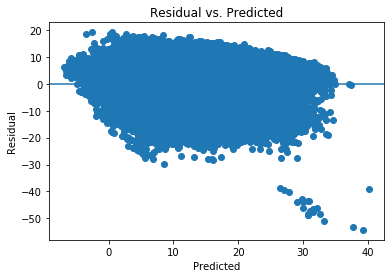

In [25]:

predictions = model.predict(X)
errors = Y - predictions

plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [54]:
df['errors']=errors
df[df.errors < -30].head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary,errors
28101,2009-12-20 20:00:00+00:00,Clear,snow,-15.000000,-15.000000,0.0,3.22,250.0,9.982,0.0,1015.1,Mostly cloudy starting overnight continuing un...,-54.294729
28103,2009-12-20 22:00:00+00:00,Clear,snow,-15.555556,-20.150000,0.0,6.44,160.0,9.982,0.0,1015.9,Mostly cloudy starting overnight continuing un...,-53.265677
28110,2009-12-21 05:00:00+00:00,Clear,snow,-13.888889,-23.266667,0.0,22.54,160.0,9.982,0.0,1016.8,Mostly cloudy starting in the morning.,-46.106309
29627,2009-01-25 10:00:00+00:00,Foggy,rain,1.111111,-3.950000,0.0,20.93,350.0,0.161,0.0,1000.1,Foggy starting overnight continuing until afte...,-39.068302
54840,2012-02-09 23:00:00+00:00,Foggy,snow,-15.555556,-15.555556,0.0,3.22,220.0,3.059,0.0,1030.8,Foggy starting in the morning continuing until...,-48.221450


We can drop those irregular datapoints and redo the model.  

In [52]:
df_new = df.drop(df[df.errors < -30].index)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95143 entries, 1 to 96452
Data columns (total 13 columns):
date                   95143 non-null datetime64[ns, UTC]
summary                95143 non-null object
preciptype             95143 non-null object
temperature            95143 non-null float64
apparenttemperature    95143 non-null float64
humidity               95143 non-null float64
windspeed              95143 non-null float64
windbearing            95143 non-null float64
visibility             95143 non-null float64
loudcover              95143 non-null float64
pressure               95143 non-null float64
dailysummary           95143 non-null object
errors                 95143 non-null float64
dtypes: datetime64[ns, UTC](1), float64(9), object(3)
memory usage: 10.2+ MB


Redo the model: 

In [53]:
Y=df_new.temperature
X=df_new[['humidity', 'windspeed', 'windbearing', 'pressure']]

import statsmodels.api as sm
     
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                 2.715e+04
Date:                Sun, 28 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:16:01   Log-Likelihood:            -3.1336e+05
No. Observations:               95143   AIC:                         6.267e+05
Df Residuals:                   95138   BIC:                         6.268e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         461.8016      2.875    160.612      

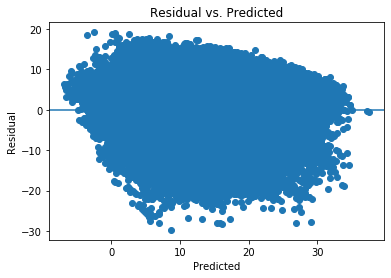

In [55]:
predictions = model.predict(X)
errors = Y - predictions

plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

By visualization, most of the errors are homoscedasitic.  There are a few high predicted numbers with large (very negative) residuals.  We can use Bartlett or Levene tests to further investigate the issue. 

In [56]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 415.984 and p value is 1.83e-92
Levene test statistic value is 289.777 and p value is 6.21e-65


Bartlett and Levene test shows that the data is heteroscedasitic.  

# Assumption four: low multicollinearity

In [34]:
X.corr()

,const,humidity,windspeed,windbearing,pressure
const,NaN,NaN,NaN,NaN,NaN
humidity,NaN,1.000000,-0.224287,0.001593,0.039259
windspeed,NaN,-0.224287,1.000000,0.101631,-0.253699
windbearing,NaN,0.001593,0.101631,1.000000,-0.078686
pressure,NaN,0.039259,-0.253699,-0.078686,1.000000


Very low collinear between variables.  The assumption is met. 

# Assumption five: error terms should be uncorrelated with one another

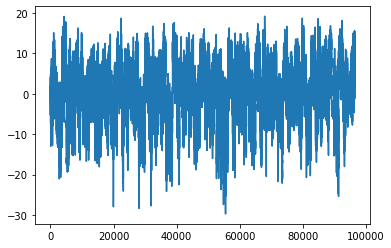

In [57]:
plt.plot(errors)
plt.show()

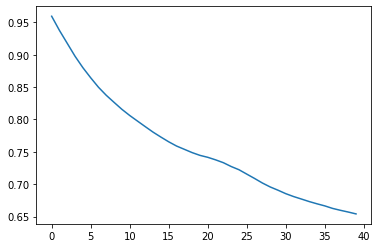

In [58]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

Since weather data is time series, autocorrelation can be expected.  But the error terms can find a pattern that repeated itself.  

# Assumption six: features shouldn't be correlated with the errors

In [63]:
df[['humidity', 'windspeed', 'windbearing', 'pressure', 'errors']].corr()

,humidity,windspeed,windbearing,pressure,errors
humidity,1.000000e+00,-2.242867e-01,1.592963e-03,3.925908e-02,2.554879e-16
windspeed,-2.242867e-01,1.000000e+00,1.016307e-01,-2.536990e-01,-5.700368e-14
windbearing,1.592963e-03,1.016307e-01,1.000000e+00,-7.868618e-02,3.817556e-15
pressure,3.925908e-02,-2.536990e-01,-7.868618e-02,1.000000e+00,1.353828e-14
errors,2.554879e-16,-5.700368e-14,3.817556e-15,1.353828e-14,1.000000e+00


The features ('humidity', 'windspeed', 'windbearing', 'pressure') are not correlated with errors.  The assumption is met.  

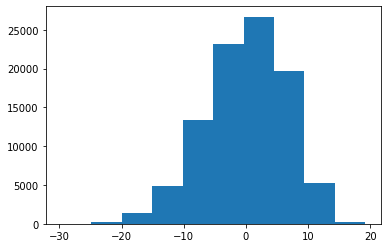

In [65]:
plt.hist(errors)
plt.show()

The errors are normally distributed. The assuption is met. 